# Capstone 1: The Fight Against Malaria
### Inferrential Stats and Analysis

Primary Questions:

1) Do any of the features associated with each data point have a preliminary correlation with the PP of malaria?
    - at this point this is informational and in preparation for the next step of the analysis.
2) Does the distribution of nets and/or the pressence of insetacide resistance play a role in reducing the point prevalence of malaria?



In [119]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')
import scipy.stats as stats
from functools import reduce 
%matplotlib inline

In [120]:
# Import CSV files
df_main = pd.read_csv('data/df_main.csv')
df_nets = pd.read_csv('data/df_nets.csv')

#### Exploing features of the primary data

In [121]:
# reminder of what we are working from
df_main.head()

Unnamed: 0  year region  country_name country_code  population  \
0           2  2013    EMR          Iraq          IRQ  33883145.0   
1           6  2011    EUR    Kyrgyzstan          KGZ   5514600.0   
2           7  2013    EUR    Kyrgyzstan          KGZ   5719600.0   
3           8  2010    EUR  Turkmenistan          TKM   5087210.0   
4           9  2011    EUR    Uzbekistan          UZB  29339400.0   

   reported_cases  reported_deaths   rainfall  temperature  percent_agg  \
0               0                0  16.434735    21.970021    21.263124   
1               0                1  36.081160     3.257430    55.310219   
2               0                0  31.007876     3.772228    55.040146   
3               0                0  11.641331    16.756224    72.351201   
4               0                0  16.376152    12.755088    62.599906   

   percent_urb  gdp_per_cap  pop_density  point_prevalence  
0       69.262  6925.224046         78.0               0.0  
1       35.342  1123.883168         28.7               0.0  
2       35.483  1282.437162         29.6               0.0  
3       48.402  4439.203000         10.8               0.0  
4       36.173  1564.966945         68.3               0.0

Questions of interest:

1) is there a correlation between rainfall, temperature, population, and point prevalencec?

2) is there a difference between the burden of malaria in countries that received indect repellent nets and those that did not?

3) is there a difference in the burden of malaria in thos countries with reported resistance and those that do not?

4) is there a difference is the average mortality in those countries with resistance and those without?

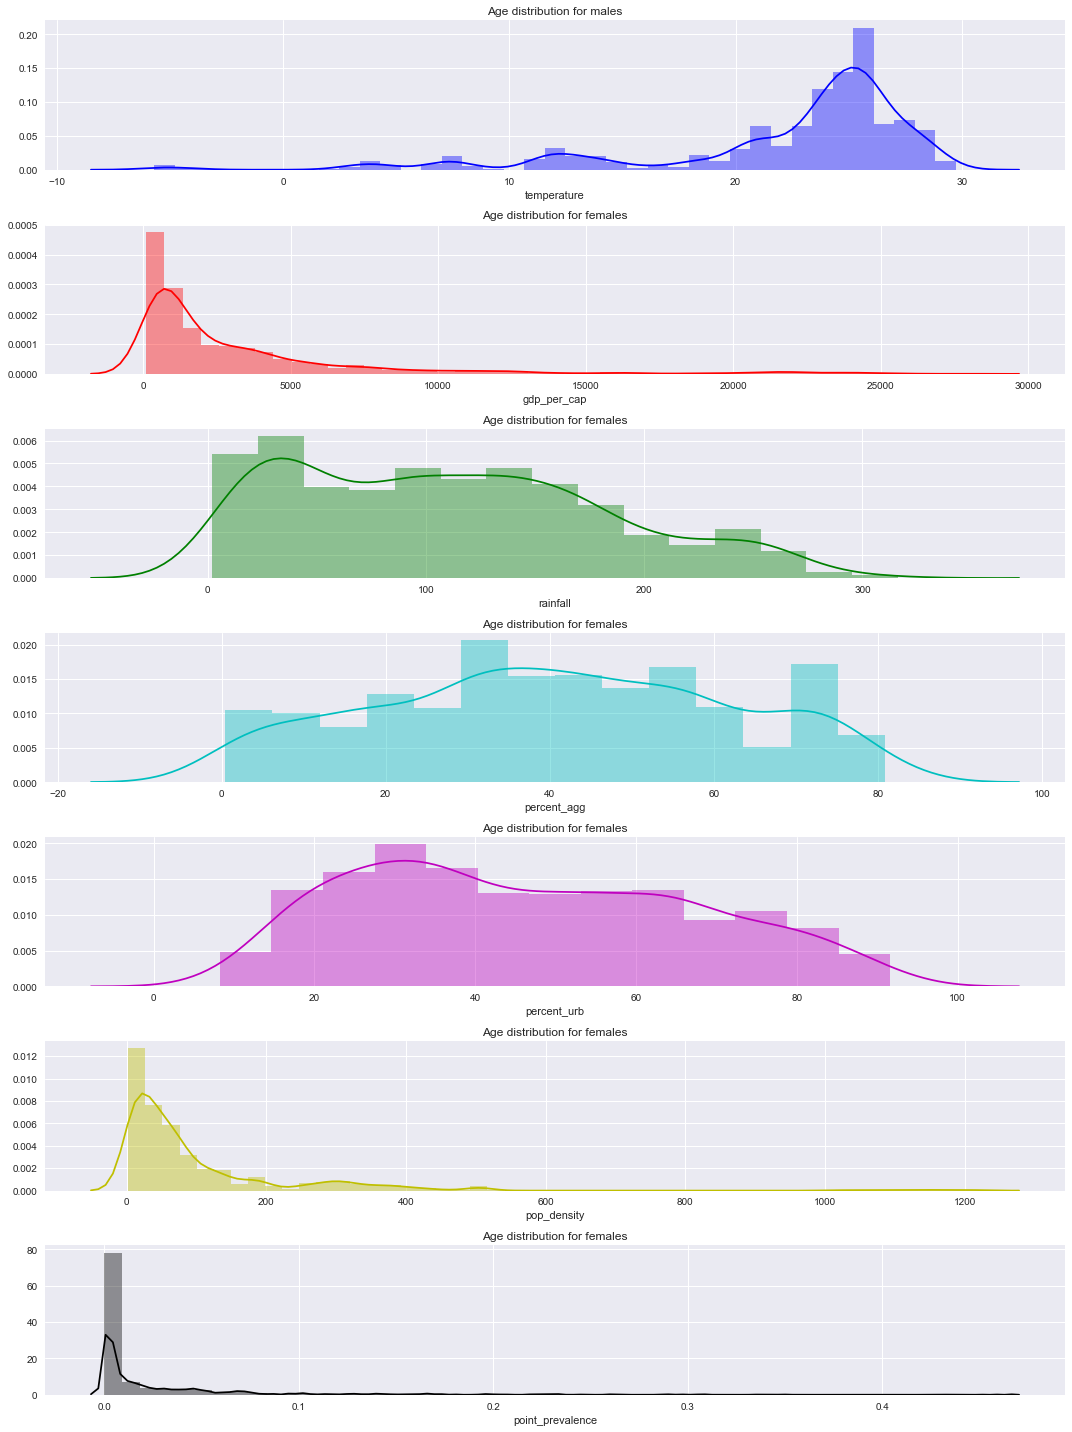

In [122]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(nrows=7, ncols=1,figsize=(15,20))

sns.distplot(df_main['temperature'], ax=ax1, color="b")
ax1.set_title("Temperature Distribution")

sns.distplot(df_main['gdp_per_cap'], ax=ax2, color="r")
ax2.set_title("Age distribution for females")

sns.distplot(df_main['rainfall'], ax=ax3, color="g")
ax3.set_title("Age distribution for females")

sns.distplot(df_main['percent_agg'], ax=ax4, color="c")
ax4.set_title("Age distribution for females")

sns.distplot(df_main['percent_urb'], ax=ax5, color="m")
ax5.set_title("Age distribution for females")

sns.distplot(df_main['pop_density'], ax=ax6, color="y")
ax6.set_title("Age distribution for females")

sns.distplot(df_main['point_prevalence'], ax=ax7, color="k")
ax7.set_title("Age distribution for females")

for ax in (ax1,ax2,ax3,ax4,ax5,ax6,ax7):
    sns.despine(ax=ax)
fig.tight_layout()

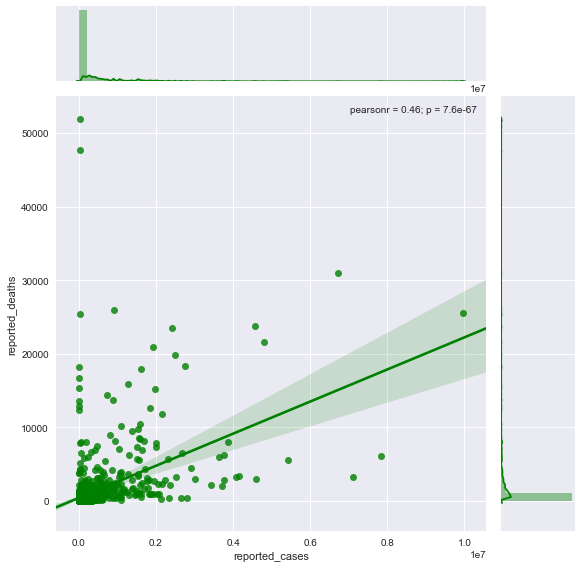

In [123]:
sns.jointplot(x="reported_cases", y="reported_deaths", data=df_main, kind='reg', color='green', size=8);

In [124]:
print(stats.pearsonr(df_main['reported_cases'], df_main['reported_deaths']))

(0.46433939204831975, 7.5604109813446257e-67)


This correlation is somewhat of a given however it is useful to see that we have many example of countries with low case numbers but very high number of deaths and vis versa. It could be highly useful to determine what factors lead to those outliers. 

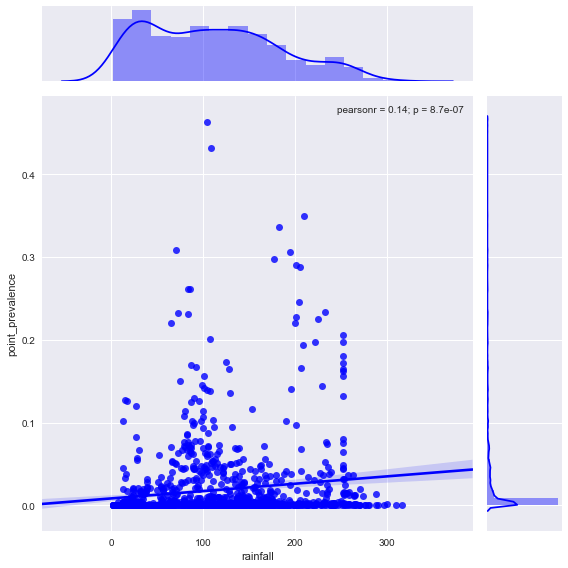

In [125]:
sns.jointplot(x="rainfall", y="point_prevalence", data=df_main, kind='reg', color='blue', size=8);

In [126]:
print(stats.pearsonr(df_main['rainfall'], df_main['point_prevalence']))

(0.13963130938693535, 8.7350628248624297e-07)


Here we can see a slightly positive correlation between rainfall and point prevalence.

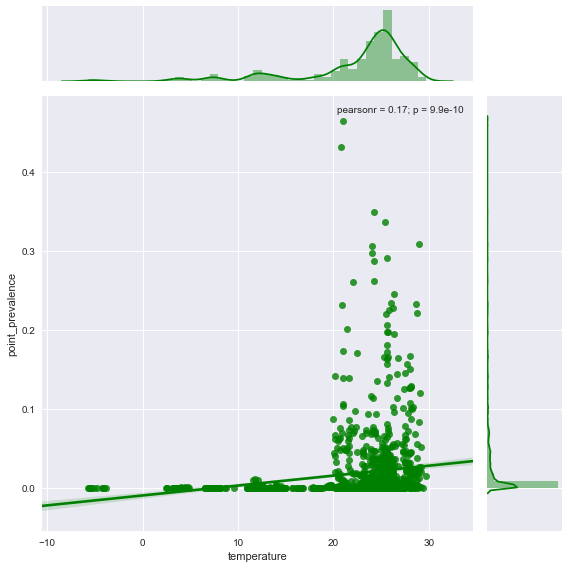

In [127]:
sns.jointplot(x="temperature", y="point_prevalence", data=df_main, kind='reg', color='green', size=8);

Slightly positive correlation betwen temperature and PP.

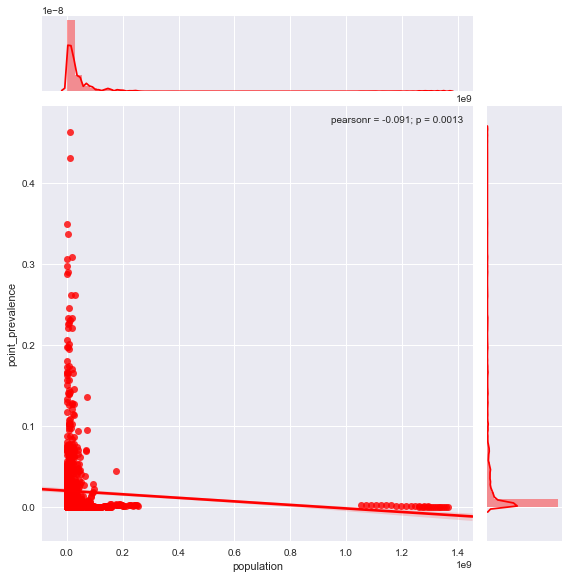

In [128]:
sns.jointplot(x="population", y="point_prevalence", data=df_main, kind='reg', color='red', size=8);

It does not appear that there is a as much of a correlation betweeb raw population and prevalence of malaria. 

What about population density?

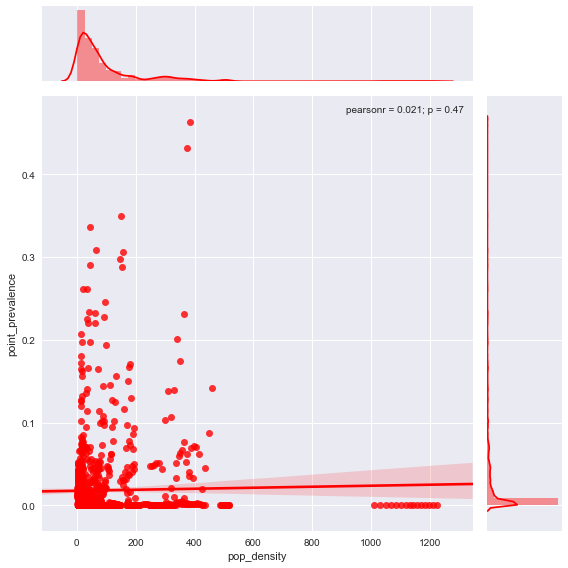

In [129]:
sns.jointplot(x="pop_density", y="point_prevalence", data=df_main, kind='reg', color='red', size=8);

Lets take a more comprehensive look...

# Nets and Insectaside Resistance
A/B testing

In [130]:
df_nets.dropna(inplace=True)
df_nets = df_nets[df_nets['point_prevalence'] >= 0]
print(df_nets.info())
df_nets.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613 entries, 6 to 1853
Data columns (total 12 columns):
Unnamed: 0           1613 non-null int64
year                 1613 non-null int64
country_code         1613 non-null object
reported_cases       1613 non-null float64
region_x             1613 non-null object
reported_deaths      1613 non-null float64
region_y             1613 non-null object
population           1613 non-null float64
tx_resistance        1613 non-null object
tx_resistance_int    1613 non-null float64
number_nets          1613 non-null float64
point_prevalence     1613 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 163.8+ KB
None


Unnamed: 0  year country_code  reported_cases region_x  reported_deaths  \
6            6  2011          KGZ             0.0      EUR              1.0   
7            7  2013          KGZ             0.0      EUR              0.0   
9            9  2011          UZB             0.0      EUR              0.0   
12          12  2013          TJK             3.0      EUR              0.0   
13          13  2010          UZB             3.0      EUR              0.0   

   region_y  population        tx_resistance  tx_resistance_int  number_nets  \
6       EUR   5514600.0  Not tested/reported                0.0          0.0   
7       EUR   5719600.0  Not tested/reported                0.0          0.0   
9       EUR  29339400.0  Not tested/reported                0.0          0.0   
12      EUR   8177809.0  Not tested/reported                0.0          0.0   
13      EUR  28562400.0  Not tested/reported                0.0          0.0   

    point_prevalence  
6       0.000000e+00  
7       0.000000e+00  
9       0.000000e+00  
12      3.668464e-07  
13      1.050332e-07

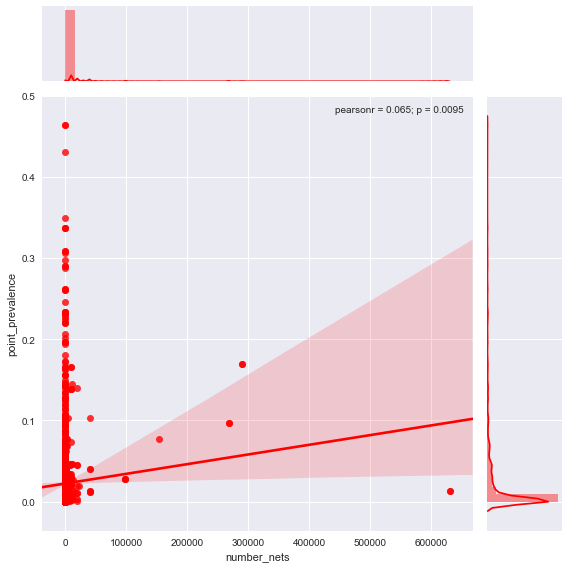

In [131]:
sns.jointplot(x="number_nets", y="point_prevalence", data=df_nets, kind='reg', color='red', size=8);

In [132]:
net_countries = df_nets.groupby(['country_code', 'year'])[['point_prevalence', 'number_nets']]

In [133]:
net_countries.head()

point_prevalence  number_nets
6         0.000000e+00          0.0
7         0.000000e+00          0.0
9         0.000000e+00          0.0
12        3.668464e-07          0.0
13        1.050332e-07          0.0
17        2.089614e-06          0.0
18        4.229907e-05          0.0
20        9.747627e-07          0.0
21        9.800981e-05          0.0
22        1.464096e-06          0.0
23        4.566730e-05          0.0
24        2.187173e-04          0.0
25        2.755939e-06          0.0
26        1.821850e-05          0.0
28        5.111479e-06          0.0
29        3.219225e-06          0.0
30        2.619816e-04          0.0
31        2.619816e-04          0.0
32        1.006711e-05          0.0
33        5.837448e-05          0.0
34        2.077064e-04          0.0
35        2.819888e-04          0.0
36        5.754808e-05          0.0
37        1.147336e-04          0.0
38        5.991966e-04          0.0
39        5.991966e-04          0.0
41        3.527962e-05          0.0
42        3.527962e-05          0.0
43        3.399771e-05          0.0
44        1.216746e-04          0.0
...                ...          ...
1822      1.268211e-02          0.0
1823      5.745307e-02          0.0
1824      5.745307e-02          0.0
1827      5.538204e-02          0.0
1828      1.015130e-01          0.0
1829      1.015130e-01          0.0
1830      1.015130e-01          0.0
1831      3.417330e-02       4000.0
1832      3.417330e-02      10000.0
1833      3.417330e-02       4500.0
1834      3.417330e-02       8400.0
1835      2.774484e-02      98025.0
1836      2.774484e-02      98025.0
1837      2.774484e-02      98025.0
1838      7.726854e-02     154230.0
1839      1.280124e-03      20000.0
1840      3.065854e-02          0.0
1841      7.044684e-02          0.0
1842      2.011476e-01          0.0
1843      1.946362e-03          0.0
1844      1.946362e-03          0.0
1845      1.946362e-03          0.0
1846      2.176117e-02          0.0
1847      1.702114e-01     290770.0
1848      1.702114e-01     290770.0
1849      9.352631e-02          0.0
1850      9.352631e-02          0.0
1851      9.352631e-02          0.0
1852      1.352224e-01          0.0
1853      1.352224e-01          0.0

[1578 rows x 2 columns]

In [134]:
# sns.jointplot(x="number_nets", y="point_prevalence", data=net_countries, kind='reg', color='red', size=8);

In [135]:
nets_by_country = df_nets.groupby('country_code')[['point_prevalence', 'number_nets']].median()

Here we are looking for a difference in the median PP in those countires with and w/o nets being distributed. Thus the actual number nets being distributed does not matter in and of itself. We are unable to accuratly further assess the utility of nets as we do not have accurat data on exactly cases and deaths in the specific areas that the nets were given out i.e. other data is a country level limiting the resolution of findings.

In [136]:
nets_by_country.head()

point_prevalence  number_nets
country_code                               
AFG                   0.002409          0.0
AGO                   0.069776          0.0
ARG                   0.000003          0.0
AZE                   0.000011          0.0
BDI                   0.122757          0.0

In [137]:
df_nets = df_nets[df_nets['population'] >= 0]

In [138]:
nets = nets_by_country[(nets_by_country['number_nets'] > 0)]
no_nets = nets_by_country[(nets_by_country['number_nets'] == 0)]

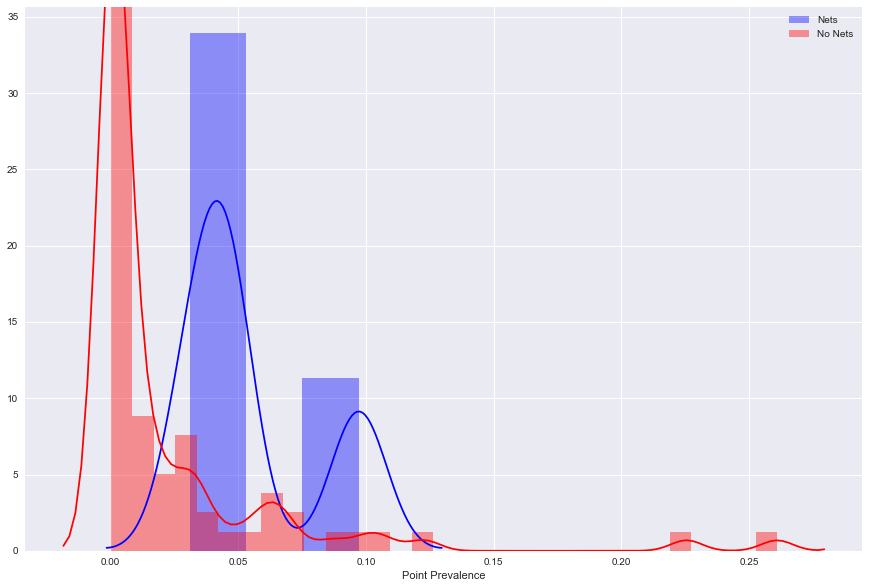

In [139]:
# Set up the matplotlib figure
f, axes = plt.subplots(figsize=(15, 10))

# Plot a simple histogram with binsize determined automatically
sns.distplot(nets['point_prevalence'], color="b", label='Nets')

# Plot a kernel density estimate and rug plot
sns.distplot(no_nets['point_prevalence'], color="r", label='No Nets')
plt.xlabel('Point Prevalence')
plt.legend();

In [140]:
stats.ttest_ind(nets['point_prevalence'], no_nets['point_prevalence'])

Ttest_indResult(statistic=1.6428202671790231, pvalue=0.10369175669437419)

In [141]:
print('Median point prevalence countries with nets being distributed: ', nets['point_prevalence'].median())
print('Median point prevalence for countries w/o nets being distributed: ', no_nets['point_prevalence'].median())
print('Difference: ',  (nets['point_prevalence'].median() - no_nets['point_prevalence'].median()))

Median point prevalence countries with nets being distributed:  0.045115460864091975
Median point prevalence for countries w/o nets being distributed:  0.0020981773912376787
Difference:  0.043017283472854294


MEDIAN

## Resistance

In [142]:
#resistance_by_country = df_nets.pivot_table(index=['country_code', 'tx_resistance_int'], values=['point_prevalence'], aggfunc='median')

In [143]:
resistance_by_country = df_nets.groupby(['country_code', 'tx_resistance_int'])['point_prevalence'].median()
resistance_by_country = resistance_by_country.reset_index()
resistance_by_country.head()

country_code  tx_resistance_int  point_prevalence
0          AFG                0.0          0.002510
1          AFG                1.0          0.002409
2          AGO                0.0          0.069776
3          AGO                1.0          0.068587
4          ARG                0.0          0.000003

Accounting for readings from the same country for with and w/o resistance is due to there being multiple readings from the same country but at different times i.e. no resistance one year and resistance the next. This can be varriable as the population of mosquitoes shifts. 

In [144]:
resistance = resistance_by_country[resistance_by_country['tx_resistance_int'] == 1]
no_resistance = resistance_by_country[resistance_by_country['tx_resistance_int'] == 0]

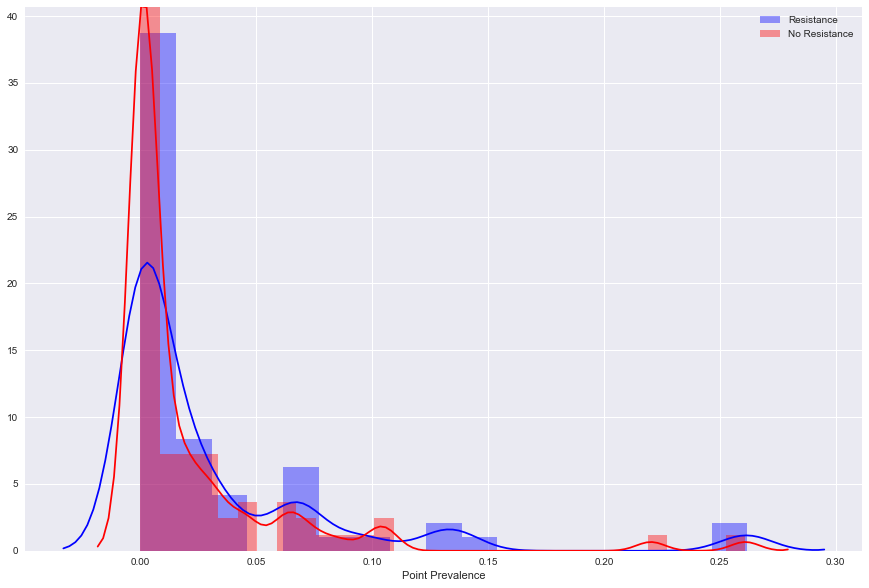

In [145]:
# Set up the matplotlib figure
f, axes = plt.subplots(figsize=(15, 10))

# Plot a simple histogram with binsize determined automatically
sns.distplot(resistance['point_prevalence'], color="b", label='Resistance')

# Plot a kernel density estimate and rug plot
sns.distplot(no_resistance['point_prevalence'], color="r", label='No Resistance')
plt.xlabel('Point Prevalence')
plt.legend();

In [146]:
stats.ttest_ind(resistance['point_prevalence'], no_resistance['point_prevalence'])

Ttest_indResult(statistic=1.4946506844414509, pvalue=0.13700015617456243)

In [147]:
print('Median point prevalence countries with insectacide resistance: ', resistance['point_prevalence'].median())
print('Median point prevalence for countries w/o insectacide resistance: ', no_resistance['point_prevalence'].median())
print('Difference: ',  (resistance['point_prevalence'].median() - no_resistance['point_prevalence'].median()))

Median point prevalence countries with insectacide resistance:  0.004838393503828494
Median point prevalence for countries w/o insectacide resistance:  0.0021929231712335467
Difference:  0.0026454703325949477


In [148]:
resistance_with_nets = df_nets[(df_nets['tx_resistance_int'] == 1) & (df_nets['number_nets'] > 0)]
no_resistance_with_nets = df_nets[(df_nets['tx_resistance_int'] == 0) & (df_nets['number_nets'] > 0)]

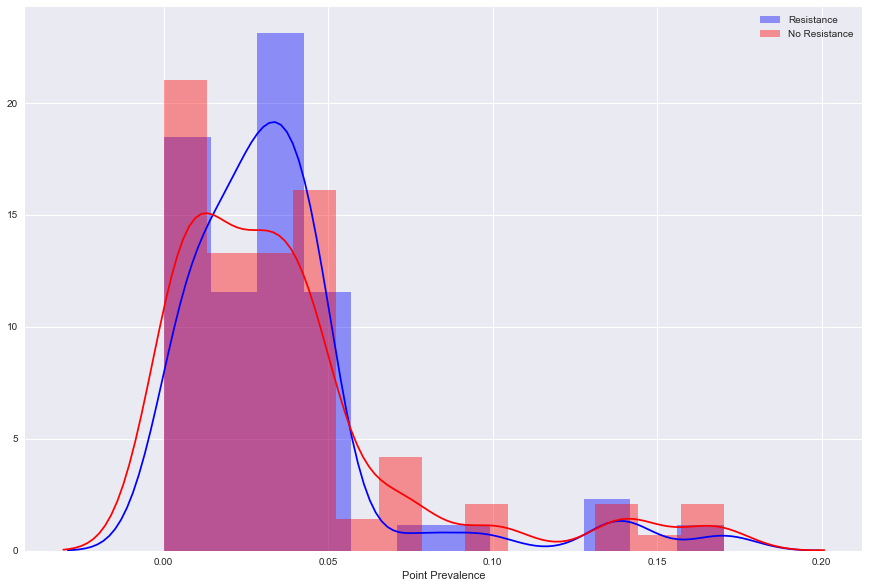

In [149]:
# Set up the matplotlib figure
f, axes = plt.subplots(figsize=(15, 10))

# Plot a simple histogram with binsize determined automatically
sns.distplot(resistance_with_nets['point_prevalence'], color="b", label='Resistance')

# Plot a kernel density estimate and rug plot
sns.distplot(no_resistance_with_nets['point_prevalence'], color="r", label='No Resistance')
plt.xlabel('Point Prevalence')
plt.legend();

In [150]:
stats.ttest_ind(resistance_with_nets['point_prevalence'], no_resistance_with_nets['point_prevalence'])

Ttest_indResult(statistic=-0.29510824180123696, pvalue=0.76827557701980886)

In [151]:
print(stats.pearsonr(df_nets['point_prevalence'], df_nets['number_nets']))

(0.064573441642017865, 0.0094837035942254445)


In [152]:
print(stats.pearsonr(df_nets['reported_deaths'], df_nets['number_nets']))

(0.055575243085658768, 0.025613826132298196)


In [153]:
print(stats.pearsonr(df_nets['reported_cases'], df_nets['number_nets']))

(0.062998254758900321, 0.011383541205648062)


Given the statistics above it would appear that the nets are not making a very pronounced difference in the effort to curtail malaria. However, I would attribute some of this to the data itself in the form of a relativly small complete data set and a likelyhood that its not just a factor of **if** nets are being distributed but also of are they being used by those who have them. The other factor is that we are looking at only a small fraction of any of these given populations receiving nets. 